
# Data Preparation

In [ ]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import datetime
#from google.colab import files
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [4]:
import os
os.chdir("C:/Users/ensch/Desktop/Research")

In [5]:
data=pd.read_csv('data.csv',delimiter=';' ,decimal=",")

In [6]:
data_sensors=pd.read_csv('additional_data.csv')

In [7]:
#Number of missing values
lis_col=[col for col in data_sensors.columns if data_sensors[col].isnull().any()]
for i in lis_col:
  count=data_sensors[i].isnull().sum()
  print(i,'=',count)

Minimum_of_smartphone_sct = 1
Maximum_of_smartphone_sct = 1
Deviation_of_smartphone_sct = 1


In [8]:
data_sensors['Minimum_of_smartphone_sct'].fillna((data_sensors['Minimum_of_smartphone_sct'].mean()), inplace=True)
data_sensors['Maximum_of_smartphone_sct'].fillna((data_sensors['Maximum_of_smartphone_sct'].mean()), inplace=True)
data_sensors['Deviation_of_smartphone_sct'].fillna((data_sensors['Deviation_of_smartphone_sct'].mean()), inplace=True)

In [9]:
#create a dataframe with ParticipantsIDs
df_ID=data[['pseudonym']]

In [10]:
# Create an empty list
Row_list_max_6mwt =[]

# Iterate over each row
for index, rows in data_sensors.iterrows():
	# Create list for the current row
	my_list1 =[rows.Maximum_of_accelerometer_6mwt_split1_v1,
  rows.Maximum_of_accelerometer_6mwt_split2_v1,
  rows.Maximum_of_accelerometer_6mwt_split3_v1,
  rows.Maximum_of_accelerometer_6mwt_split4_v1,
  rows.Maximum_of_accelerometer_6mwt_split1_v2,
  rows.Maximum_of_accelerometer_6mwt_split2_v2,
  rows.Maximum_of_accelerometer_6mwt_split3_v2,
  rows.Maximum_of_accelerometer_6mwt_split4_v2,
  rows.Maximum_of_accelerometer_6mwt_split1_v3,
  rows.Maximum_of_accelerometer_6mwt_split2_v3,
  rows.Maximum_of_accelerometer_6mwt_split3_v3,
  rows.Maximum_of_accelerometer_6mwt_split4_v3]
	
	# append the list to the final list
	Row_list_max_6mwt.append(my_list1)
# Print the list
#print(Row_list_max_6mwt)

In [11]:
#get the global maximum of accelerometer for each participants
l1=[]
for i in Row_list_max_6mwt:
  m=max(i)
  l1.append(m)
col=pd.DataFrame(l1,columns = ['Global_6mwt_max_acc'])

In [12]:
# Create an empty list
Row_list_min_6mwt =[]

# Iterate over each row
for index, rows in data_sensors.iterrows():
	# Create list for the current row
	my_list =[rows.Maximum_of_accelerometer_6mwt_split1_v1,
	rows.Minimum_of_accelerometer_6mwt_split1_v1,
	rows.Minimum_of_accelerometer_6mwt_split2_v1,
	rows.Minimum_of_accelerometer_6mwt_split3_v1,
	rows.Minimum_of_accelerometer_6mwt_split4_v1,
	rows.Minimum_of_accelerometer_6mwt_split1_v2,
	rows.Minimum_of_accelerometer_6mwt_split2_v2,
	rows.Minimum_of_accelerometer_6mwt_split3_v2,
	rows.Minimum_of_accelerometer_6mwt_split4_v2,
	rows.Minimum_of_accelerometer_6mwt_split1_v3,
	rows.Minimum_of_accelerometer_6mwt_split2_v3,
	rows.Minimum_of_accelerometer_6mwt_split3_v3,
	rows.Minimum_of_accelerometer_6mwt_split4_v3]
	# append the list to the final list
	Row_list_min_6mwt.append(my_list)
#print(Row_list_min_6mwt)

In [13]:
#get the global minima of accelerometer for each participants-6mwt
l2=[]
for i in Row_list_min_6mwt:
  m=max(i)
  l2.append(m)
col2=pd.DataFrame(l2,columns = ['Global_6mwt_min_acc'])

In [14]:
# Create an empty list
Row_list_min_sct =[]

# Iterate over each row
for index, rows in data_sensors.iterrows():
	# Create list for the current row
	my_list =[
  rows.Minimum_of_accelerometer_sct_split1_v1,
  rows.Minimum_of_accelerometer_sct_split2_v1,
  rows.Minimum_of_accelerometer_sct_split1_v2,
  rows.Minimum_of_accelerometer_sct_split2_v2,
  rows.Minimum_of_accelerometer_sct_split1_v3,
  rows.Minimum_of_accelerometer_sct_split2_v3
  ]
	# append the list to the final list
	Row_list_min_sct.append(my_list)
 
#print(Row_list_min_sct)

In [15]:
#get the global minima of accelerometer for each participants-sct
l3=[]
for i in Row_list_min_sct:
  m=max(i)
  l3.append(m)
col3=pd.DataFrame(l3,columns = ['Global_sct_min_acc'])

In [16]:
# Create an empty list
Row_list_max_sct =[]

# Iterate over each row
for index, rows in data_sensors.iterrows():
	# Create list for the current row
	my_list =[rows.Maximum_of_accelerometer_sct_split1_v1,
  rows.Maximum_of_accelerometer_sct_split2_v1,
  rows.Maximum_of_accelerometer_sct_split1_v2,
  rows.Maximum_of_accelerometer_sct_split2_v2,
  rows.Maximum_of_accelerometer_sct_split1_v3,
  rows.Maximum_of_accelerometer_sct_split2_v3,
  ]
	# append the list to the final list
	Row_list_max_sct.append(my_list)
 
#print(Row_list_max_sct)

In [17]:
#get the global minima of accelerometer for each participants-sct
l4=[]
for i in Row_list_max_sct:
  m=max(i)
  l4.append(m)
col4=pd.DataFrame(l4,columns = ['Global_sct_max_acc'])

In [18]:
#concatenate all the global data with sensor data
global_data_sensor=pd.concat([data_sensors, col, col2, col3, col4], axis = 1)

In [17]:
#global_data_sensor

In [19]:
global_data_sensor.drop(['Maximum_of_accelerometer_6mwt_split1_v1',
'Maximum_of_accelerometer_6mwt_split2_v1',
'Maximum_of_accelerometer_6mwt_split3_v1',
'Maximum_of_accelerometer_6mwt_split4_v1',
'Maximum_of_accelerometer_6mwt_split1_v2',
'Maximum_of_accelerometer_6mwt_split2_v2',
'Maximum_of_accelerometer_6mwt_split3_v2',
'Maximum_of_accelerometer_6mwt_split4_v2',
'Maximum_of_accelerometer_6mwt_split1_v3',
'Maximum_of_accelerometer_6mwt_split2_v3',
'Maximum_of_accelerometer_6mwt_split3_v3',
'Maximum_of_accelerometer_6mwt_split4_v3',
'Minimum_of_accelerometer_6mwt_split1_v1',
'Minimum_of_accelerometer_6mwt_split2_v1',
'Minimum_of_accelerometer_6mwt_split3_v1',
'Minimum_of_accelerometer_6mwt_split4_v1',
'Minimum_of_accelerometer_6mwt_split1_v2',
'Minimum_of_accelerometer_6mwt_split2_v2',
'Minimum_of_accelerometer_6mwt_split3_v2',
'Minimum_of_accelerometer_6mwt_split4_v2',
'Minimum_of_accelerometer_6mwt_split1_v3',
'Minimum_of_accelerometer_6mwt_split2_v3',
'Minimum_of_accelerometer_6mwt_split3_v3',
'Minimum_of_accelerometer_6mwt_split4_v3',
'Deviation_of_accelerometer_6mwt_split1_v1',
 'Deviation_of_accelerometer_6mwt_split2_v1',
 'Deviation_of_accelerometer_6mwt_split3_v1',
 'Deviation_of_accelerometer_6mwt_split4_v1',
 'Deviation_of_accelerometer_6mwt_split1_v2',
 'Deviation_of_accelerometer_6mwt_split2_v2',
 'Deviation_of_accelerometer_6mwt_split3_v2',
 'Deviation_of_accelerometer_6mwt_split4_v2',
 'Deviation_of_accelerometer_6mwt_split1_v3',
 'Deviation_of_accelerometer_6mwt_split2_v3',
 'Deviation_of_accelerometer_6mwt_split3_v3',
 'Deviation_of_accelerometer_6mwt_split4_v3',
 'Deviation_of_smartphone_6mwt',
 'Deviation_of_smartphone_sct',
 'Deviation_of_fitbit_6mwt',
 'Deviation_of_fitbit_sct',
 'Deviation_of_accerometer_sct_split1_V1',
 'Deviation_of_accerometer_sct_split2_V1',
 'Deviation_of_accerometer_sct_split1_V2',
 'Deviation_of_accerometer_sct_split2_V2',
 'Deviation_of_accerometer_sct_split1_V3',
 'Deviation_of_accerometer_sct_split2_V3',
 'amount_of_confidence_zero_in_6mwt',
 'amount_of_confidence_one_in_6mwt',
 'amount_of_confidence_two_in_6mwt',
 'amount_of_confidence_three_in_6mwt',
 'amount_of_confidence_zero_in_sct',
 'amount_of_confidence_one_in_sct',
 'amount_of_confidence_two_in_sct',
 'amount_of_confidence_three_in_sct',
 'Maximum_of_accelerometer_sct_split1_v1',
'Minimum_of_accelerometer_sct_split1_v1',
'Maximum_of_accelerometer_sct_split2_v1',
'Minimum_of_accelerometer_sct_split2_v1',
'Maximum_of_accelerometer_sct_split1_v2',
'Minimum_of_accelerometer_sct_split1_v2',
'Maximum_of_accelerometer_sct_split2_v2',
'Minimum_of_accelerometer_sct_split2_v2',
'Maximum_of_accelerometer_sct_split1_v3',
'Minimum_of_accelerometer_sct_split1_v3',
'Maximum_of_accelerometer_sct_split2_v3',
'Minimum_of_accelerometer_sct_split2_v3'],axis=1,inplace=True)

In [20]:
#drop Psuedonym from data_sensor
data_sensors.drop(['id'],axis=1,inplace=True)

In [21]:
#count for missing values in 'data' dataset
lis_col=[col for col in data.columns if data[col].isnull().any()]
for i in lis_col:
  count=data[i].isnull().sum()
  print(i,'=',count)

bsa_B = 18
bsa_F = 7
bsa_S = 13
abi_p_vig = 1
abi_p_kov = 1
swe_6mwt_t1 = 21
swe_6mwt_t2 = 21
swe_6mwt_t3 = 21
swe_6mwt_t4 = 21
swe_sct_t1 = 21
swe_sct_t2 = 21
swe_sct_t3 = 21
swe_sct_t4 = 21


In [22]:
#Handle missing values
data['bsa_F'].fillna((data['bsa_F'].mean()), inplace=True)
data['bsa_S'].fillna((data['bsa_S'].mean()), inplace=True)
data['abi_p_vig'].fillna((data['abi_p_vig'].mean()), inplace=True)
data['abi_p_kov'].fillna((data['abi_p_kov'].mean()), inplace=True)
data_sensors['Minimum_of_smartphone_sct'].fillna((data_sensors['Minimum_of_smartphone_sct'].mean()), inplace=True)
data_sensors['Maximum_of_smartphone_sct'].fillna((data_sensors['Maximum_of_smartphone_sct'].mean()), inplace=True)
#replace NaN values in bsa_B column with zero
data['bsa_B'] = data['bsa_B'].replace(np.nan, 0)

In [23]:
#convert categorical column into numerical values
arrival_mode= data[['arrival']]
arrival_mode= pd.get_dummies(arrival_mode, drop_first=True)
data.drop(['arrival'],axis=1,inplace=True) #drop arrival column
#concatenate global_data_sensor and data,arrival_mode
df_conc=pd.concat([data,arrival_mode,global_data_sensor],axis=1)

#drop Id column from df_conc dataset
df_conc.drop(['pseudonym'],axis=1,inplace=True)

In [24]:
#count for missing values in 'df_conc' dataset
lis_col=[col for col in df_conc.columns if df_conc[col].isnull().any()]
for i in lis_col:
  count=df_conc[i].isnull().sum()
  print(i,'=',count)

swe_6mwt_t1 = 21
swe_6mwt_t2 = 21
swe_6mwt_t3 = 21
swe_6mwt_t4 = 21
swe_sct_t1 = 21
swe_sct_t2 = 21
swe_sct_t3 = 21
swe_sct_t4 = 21


In [25]:
#From the data collection prespective, these are actually not missing values,Its part of the system. 
#So we gather data for each person based on first task (column: firstTask) he/she performed.
data_swe=df_conc[['firstTask','swe_6mwt_t1','swe_6mwt_t2','swe_6mwt_t3', 'swe_6mwt_t4','swe_sct_t1','swe_sct_t2','swe_sct_t3','swe_sct_t4']]
#reduce data_ft1 and data_ft0 into four columns with names 6mwtask1,	6mwtask2,	sctask1 and sctask2 based on firstTask column
data_ft1=data_swe[data_swe['firstTask']==1]
data_ft0=data_swe[data_swe['firstTask']==0]
data_ft1.drop(['swe_6mwt_t1','swe_6mwt_t2','swe_sct_t3','swe_sct_t4'],axis=1,inplace=True)
data_ft0.drop(['swe_6mwt_t3','swe_6mwt_t4','swe_sct_t1','swe_sct_t2'],axis=1,inplace=True)

data_ft1.rename(columns={'swe_6mwt_t3': 'swe_6mwtask_before', 'swe_6mwt_t4': 'swe_6mwtask_after','swe_sct_t1': 'swe_sctask_before','swe_sct_t2': 'swe_sctask_after'}, inplace=True)
data_ft0.rename(columns={'swe_6mwt_t1': 'swe_6mwtask_before', 'swe_6mwt_t2': 'swe_6mwtask_after','swe_sct_t3': 'swe_sctask_before','swe_sct_t4': 'swe_sctask_after'}, inplace=True)
df_task=pd.concat([data_ft0, data_ft1], sort=True)
df_task_sorted=df_task.sort_index()
df_task_sorted.drop(['firstTask'],axis=1,inplace=True)

ft_01=pd.concat([df_conc,df_task_sorted],axis=1)
ft_01.drop(['swe_6mwt_t1','swe_6mwt_t2','swe_6mwt_t3','swe_6mwt_t4','swe_sct_t1','swe_sct_t2','swe_sct_t3','swe_sct_t4','id'],axis=1,inplace=True)



<ipython-input-25-1bed80067a31>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ft1.drop(['swe_6mwt_t1','swe_6mwt_t2','swe_sct_t3','swe_sct_t4'],axis=1,inplace=True)
<ipython-input-25-1bed80067a31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ft0.drop(['swe_6mwt_t3','swe_6mwt_t4','swe_sct_t1','swe_sct_t2'],axis=1,inplace=True)
<ipython-input-25-1bed80067a31>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ft1.rena

In [26]:
ft_01.head()

,ageGroup,gender,bmi,smoker,employed,sports,timeOfDay,testSuit,firstTask,dist_6mwt,...,Minimum_of_fitbit_sct,Maximum_of_fitbit_sct,Global_6mwt_max_acc,Global_6mwt_min_acc,Global_sct_min_acc,Global_sct_max_acc,swe_6mwtask_after,swe_6mwtask_before,swe_sctask_after,swe_sctask_before
0,1,0,26.5,0,1,1,1,0,1,421.00,...,84,94,2.093750,1.753906,0.242188,3.156250,9.5,9.5,8.5,9.00
1,0,1,25.5,0,1,0,0,1,0,600.00,...,100,124,2.433594,1.878906,-0.222656,3.835938,10.0,5.5,10.0,8.75
2,0,0,22.1,0,1,1,0,1,1,689.00,...,95,151,4.613281,2.703125,0.167969,3.769531,10.0,9.5,10.0,9.00
3,1,1,22.1,0,1,1,0,1,0,654.55,...,73,102,2.921875,2.582031,-0.226562,2.761719,8.0,9.0,7.0,10.00
4,1,1,26.0,0,0,1,1,0,1,512.00,...,91,122,0.972656,0.941406,-0.046875,6.027344,10.0,8.5,6.5,4.50


In [27]:
#check if there is any missing values in ft_01
#count for missing values in 'data' dataset
lis_col=[col for col in ft_01.columns if ft_01[col].isnull().any()]
for i in lis_col:
  count=ft_01[i].isnull().sum()
  print(i,'=',count)

In [31]:
#create a subset from ft_01 (swe + bsa + wkv + movement data)
subset_ft01=ft_01[['ageGroup', 'gender', 'bmi', 'smoker', 'employed', 'sports',
       'timeOfDay', 'testSuit', 'firstTask', 'dist_6mwt', 'dist_sct',
       'swe_b_t1', 'swe_b_t4', 'swe_m_t1', 'swe_m_t4', 'swe_f_t1', 'swe_f_t4',
       'swe_a_t1', 'swe_a_t4',
       'bsa_B', 'bsa_F', 'bsa_S','wkv_a_t1',
       'wkv_a_t2', 'wkv_a_t3', 'wkv_a_t4', 'wkv_b_t1', 'wkv_b_t2', 'wkv_b_t3',
       'wkv_b_t4', 'wkv_g_t1', 'wkv_g_t2', 'wkv_g_t3', 'wkv_g_t4', 'wkv_t_t1',
       'wkv_t_t2', 'wkv_t_t3', 'wkv_t_t4', 
       'arrival_car/motorcycle', 'arrival_on foot', 'arrival_public transport',
       'Minimum_of_smartphone_6mwt', 'Maximum_of_smartphone_6mwt',
       'Minimum_of_smartphone_sct', 'Maximum_of_smartphone_sct',
       'Minimum_of_fitbit_6mwt', 'Maximum_of_fitbit_6mwt',
       'Minimum_of_fitbit_sct', 'Maximum_of_fitbit_sct', 'Global_6mwt_max_acc',
       'Global_6mwt_min_acc', 'Global_sct_min_acc', 'Global_sct_max_acc',
       'swe_6mwtask_after', 'swe_6mwtask_before', 'swe_sctask_after',
       'swe_sctask_before']]

In [34]:
#check the correlation for variable in each datasets (subset_ft0, subset_ft1 and subset_ft01)
def correlation(d,mild_corr):
  correlated_features = set() #use set data structure for avoid duplicates
  correlation_matrix = d.corr()
  for i in range(len(correlation_matrix .columns)):
      for j in range(i):
          if abs(correlation_matrix.iloc[i, j]) > mild_corr:
              colname = correlation_matrix.columns[i]
              correlated_features.add(colname)
  return correlated_features

dataset={'subset_ft01':subset_ft01}
mild_corr=0.8
for key in dataset:
  d=dataset[key]
  rslt=correlation(d,mild_corr)
  print('Highly correlated variables in {} are {}'.format(key,rslt))

Highly correlated variables in subset_ft01 are {'Maximum_of_smartphone_sct', 'wkv_g_t4', 'Global_6mwt_min_acc', 'wkv_g_t3', 'Global_sct_max_acc'}


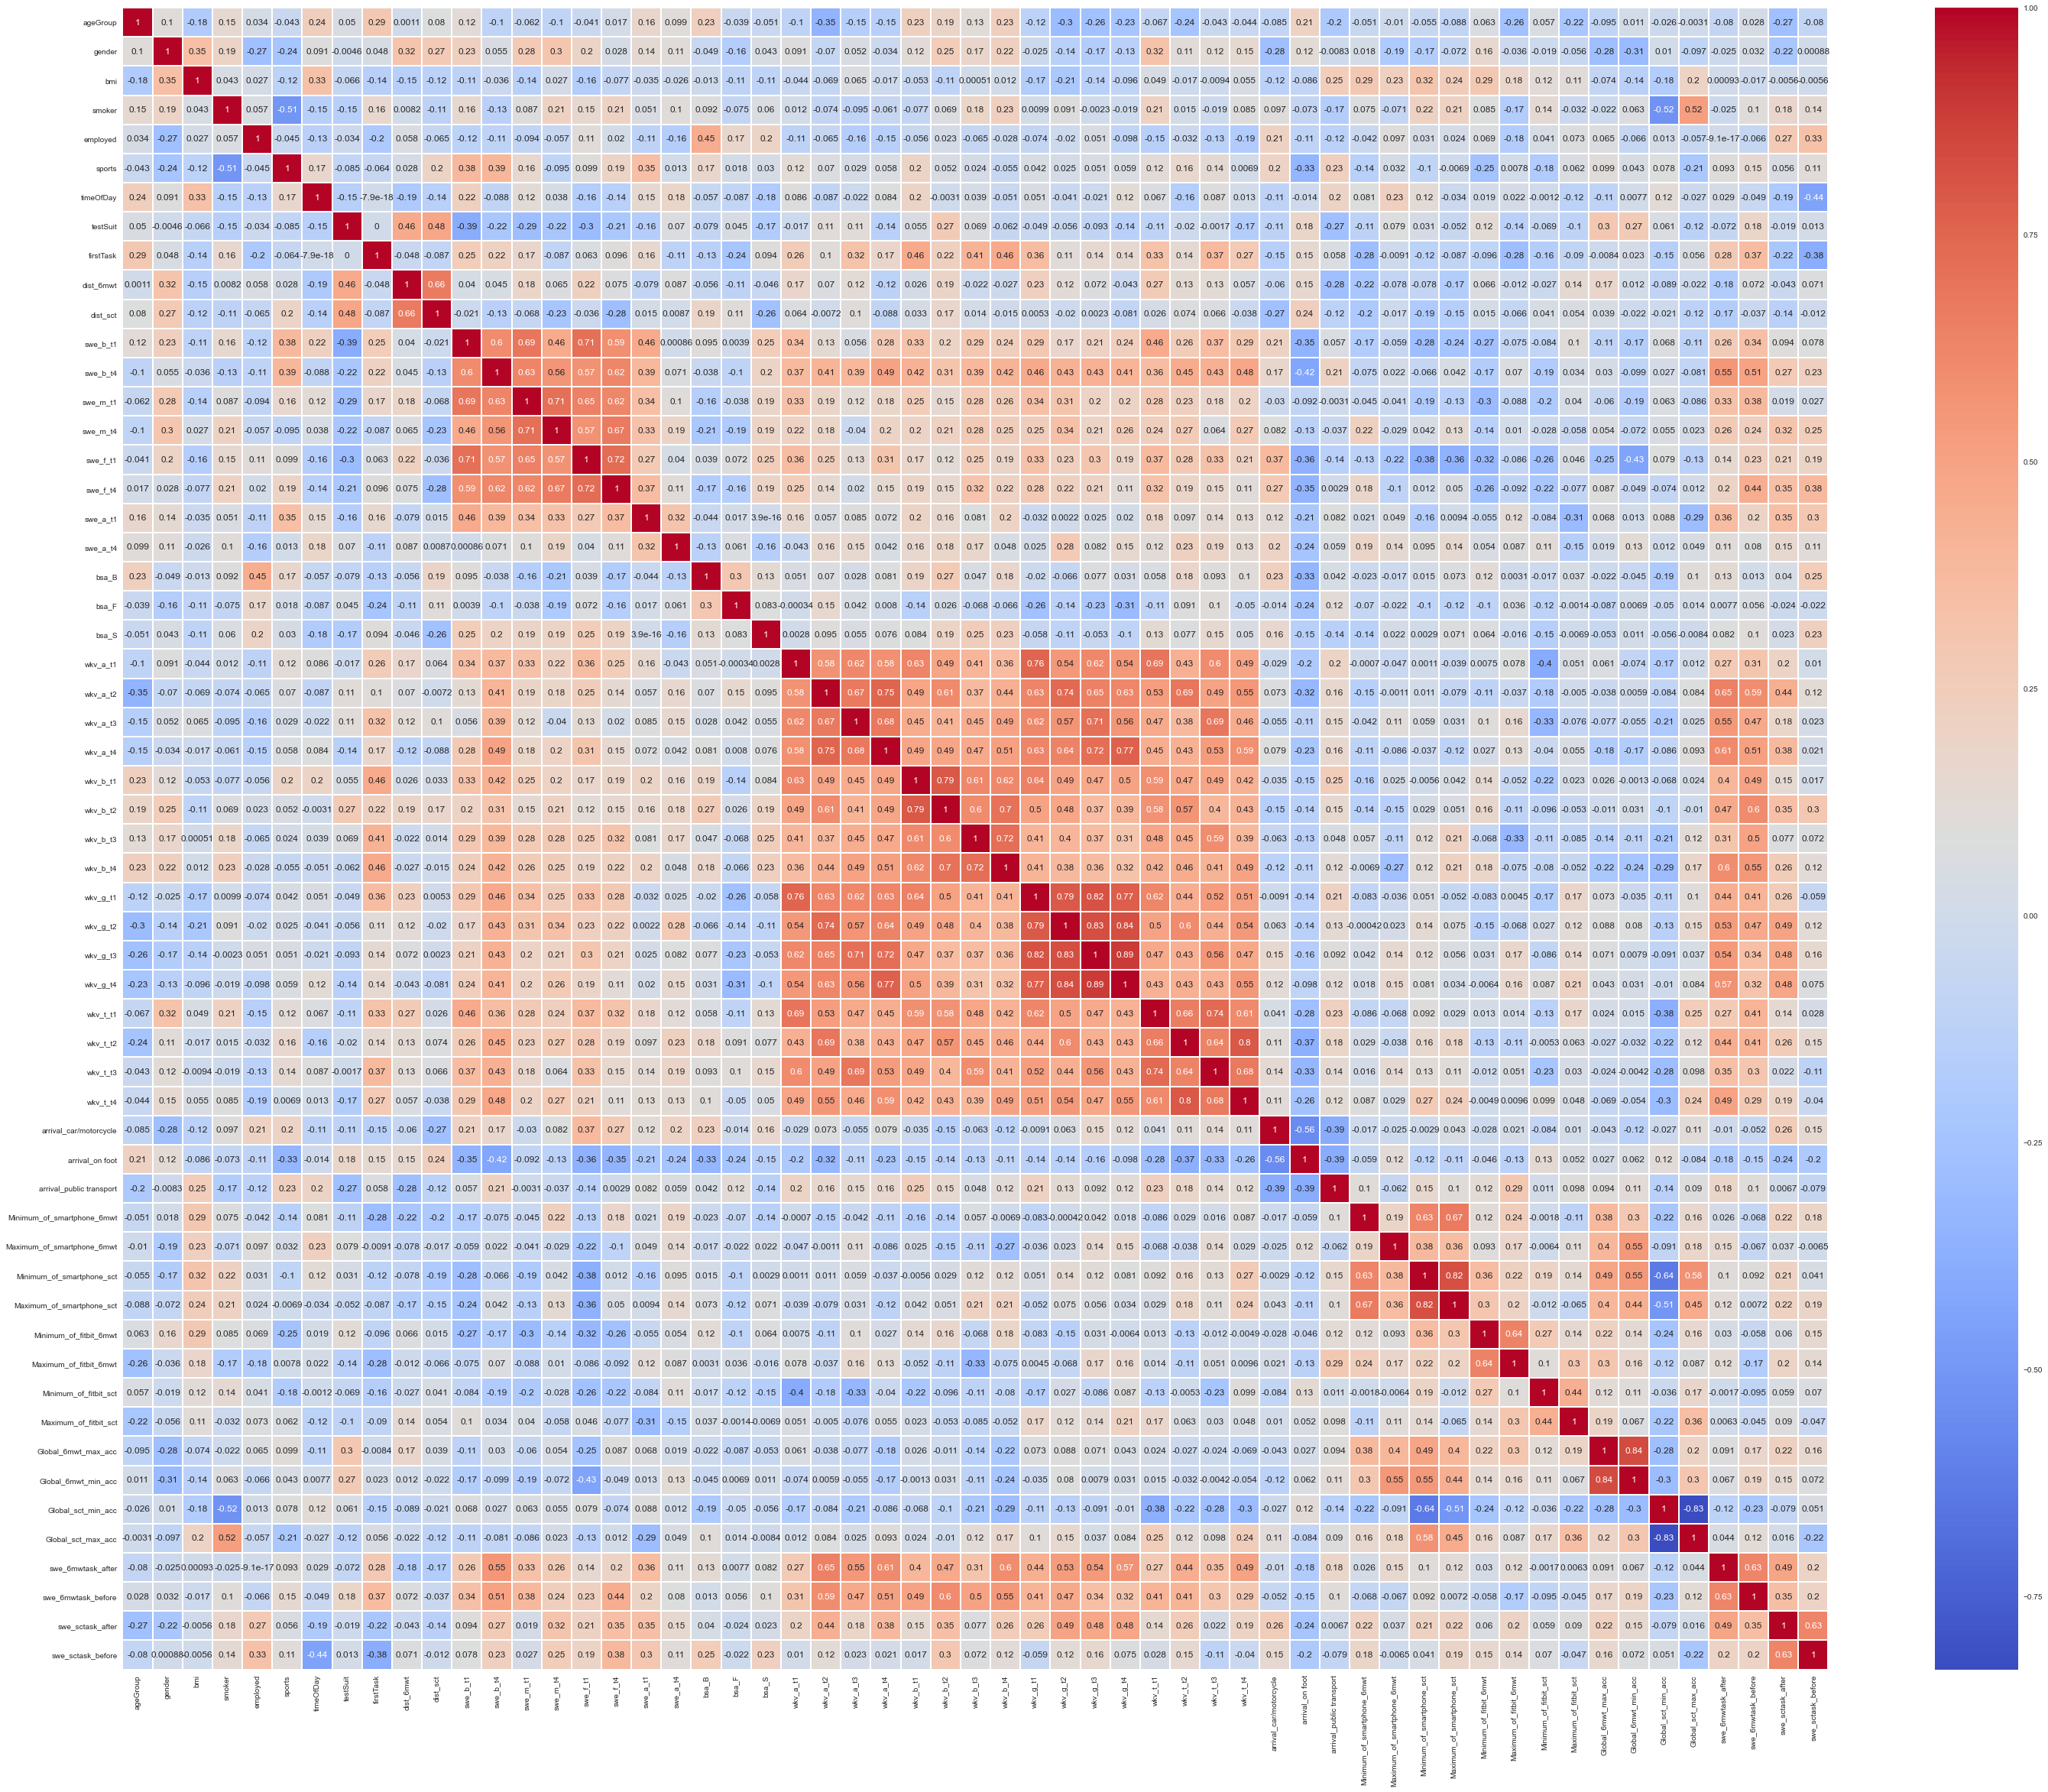

In [33]:
corr_table = subset_ft01.corr(method='pearson')
plt.figure(figsize = (50,40))
sns.heatmap(corr_table, cmap = "coolwarm", linecolor = 'white', linewidth = 1, annot = True)
plt.show()

In [ ]:
#we are keeping these highly correlated variables for now.

# Normalization and Dimensionality Reduction (PCA)

In [35]:
#normalize subset_ft01
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_subset_ft01=pd.DataFrame(scaler.fit_transform(subset_ft01),columns=subset_ft01.columns)
# dimensionality reduction
# Initialize the algorithm and set the number of PC's
# Obtain the principal components for both data sets subset_ft0 and subset_ft1
pca=PCA(n_components=2)
principal_comp_01=pca.fit_transform(norm_subset_ft01)
df_ft01_pca = pd.DataFrame(data = principal_comp_01, columns =['pca1','pca2'])


# Optimal K

Find the optimal number of clusters for kmean - df_ft01_pca dataset

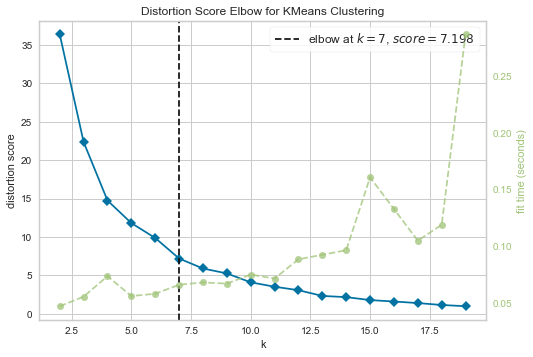

In [42]:
np.random.seed(0)
lis=[]
# Elbow Method for K means
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(df_ft01_pca)        # Fit data to visualizer
k_elbow_ft01=visualizer.elbow_value_
lis.append(k_elbow_ft01)
visualizer.show() 

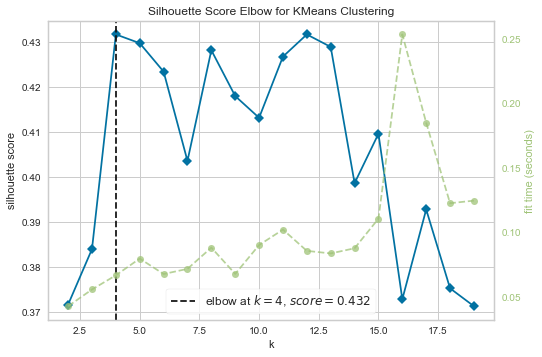

In [43]:
# Silhouette Score for K means
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(df_ft01_pca)        # Fit the data to the visualizer
k_silo_ft01=visualizer.elbow_value_
lis.append(k_silo_ft01)
visualizer.show()        # Finalize and render the figure

<ipython-input-44-3a5a5c60a9c7>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
<ipython-input-44-3a5a5c60a9c7>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
<ipython-input-44-3a5a5c60a9c7>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
<ipython-input-44-3a5a5c60a9c7>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


    clusterCount       gap
0            1.0 -2.112053
1            2.0 -2.251981
2            3.0 -2.325477
3            4.0 -2.248672
4            5.0 -2.288674
5            6.0 -2.454322
6            7.0 -2.290837
7            8.0 -2.206837
8            9.0 -2.408443
9           10.0 -2.344483
10          11.0 -2.328437
11          12.0 -2.059821
12          13.0 -2.144440
13          14.0 -2.215974
14          15.0 -2.287505
15          16.0 -2.399828
16          17.0 -2.313488
17          18.0 -2.208177
18          19.0 -2.290557
    clusterCount       gap
11          12.0 -2.059821


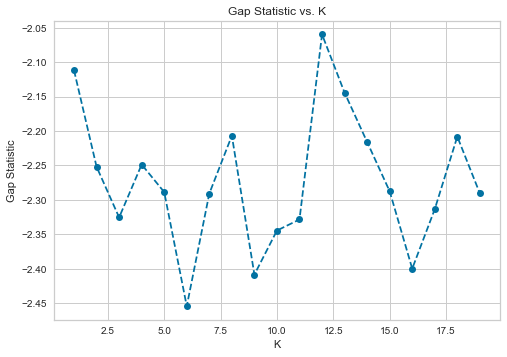

In [44]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    print(resultsdf)
    print(resultsdf[resultsdf.gap == resultsdf.gap.max()])
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(df_ft01_pca, nrefs=3, maxClusters=20)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

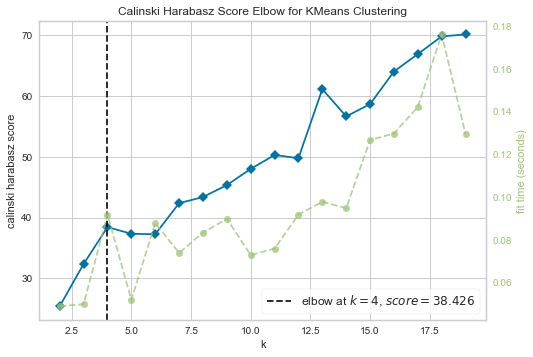

In [45]:
# Calinski Harabasz Score for K means
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(df_ft01_pca)        # Fit the data to the visualizer
k_cali_ft01=visualizer.elbow_value_
lis.append(k_cali_ft01)
visualizer.show()

In [ ]:
#We go with k=4

# Clustering : KMeans

Clustering on df_ft01_pca

In [46]:
kmeans = KMeans(4)
kmeans.fit(df_ft01_pca)
labels_ft01 = kmeans.labels_ #label/ cluster associating to each data points
#this is centroid of all clusters
kmeans.cluster_centers_.shape
#create a data frame having kmeans centroid and col of df1
cluster_centers_ft01 = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_ft01_pca.columns])
y_kmeans_ft01 = kmeans.fit_predict(df_ft01_pca)

In [47]:
# concatenate the clusters labels to our original dataframe(subset_ft01)
cluster_ft01 = pd.concat([subset_ft01, pd.DataFrame({'cluster':labels_ft01})], axis = 1)

In [58]:
#Correlation check
corr_table = cluster_ft01.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster']

ageGroup                           NaN
gender                             NaN
bmi                                NaN
smoker                             NaN
employed                           NaN
sports                             NaN
timeOfDay                          NaN
testSuit                           NaN
firstTask                          NaN
dist_6mwt                          NaN
dist_sct                           NaN
swe_b_t1                           NaN
swe_b_t4                           NaN
swe_m_t1                           NaN
swe_m_t4                           NaN
swe_f_t1                           NaN
swe_f_t4                           NaN
swe_a_t1                           NaN
swe_a_t4                           NaN
bsa_B                              NaN
bsa_F                              NaN
bsa_S                              NaN
wkv_a_t1                      0.511166
wkv_a_t2                      0.544428
wkv_a_t3                           NaN
wkv_a_t4                 

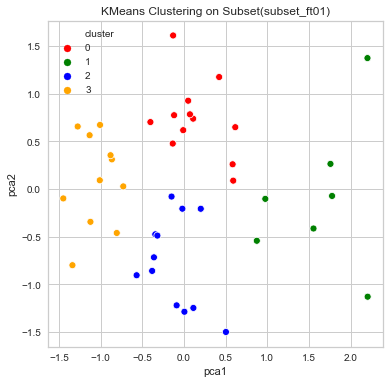

In [48]:
#visualize the clusters using principal components
ft01 = pd.concat([df_ft01_pca,pd.DataFrame({'cluster':labels_ft01})], axis = 1)
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = ft01, palette =['red','green','blue','orange'])
plt.title('KMeans Clustering on Subset(subset_ft01)')
plt.show()

# Clustering HAC

2


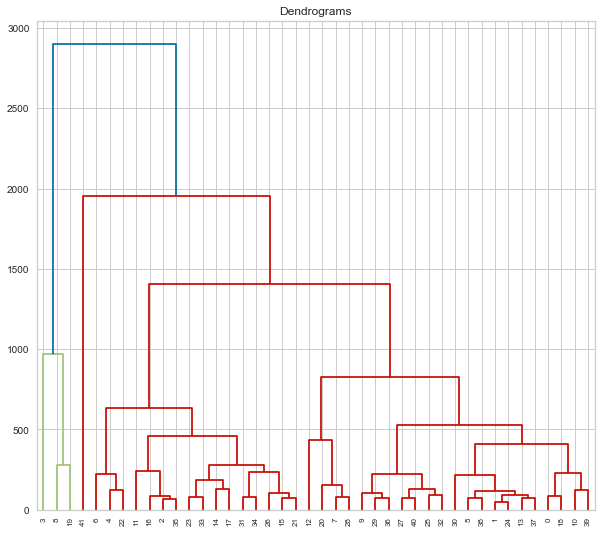

In [49]:
#implement heirarchical clustering. #provide normalized data(data_final) instead of df_pca
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 9))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(subset_ft01, method='ward'))
#plt.axhline(y=6, color='r', linestyle='--')
#based on colour , we can decide optimal number of cluster. Or draw a horizontal line over blue line find count of intercet points
optimal_num_clusters=len(set(dend['color_list']))-1
print(optimal_num_clusters)
cluster = AgglomerativeClustering(n_clusters=optimal_num_clusters, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(subset_ft01)
#0 represents the points that belong to the first cluster and 1 represents points in the second cluster.

In [59]:
#Correlation check
subset_ft01_hac = pd.concat([subset_ft01, pd.DataFrame({'cluster_hac':y_hc})], axis = 1)
corr_table = subset_ft01_hac.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster_hac']

ageGroup                           NaN
gender                             NaN
bmi                                NaN
smoker                             NaN
employed                           NaN
sports                             NaN
timeOfDay                          NaN
testSuit                           NaN
firstTask                          NaN
dist_6mwt                          NaN
dist_sct                           NaN
swe_b_t1                           NaN
swe_b_t4                           NaN
swe_m_t1                           NaN
swe_m_t4                           NaN
swe_f_t1                           NaN
swe_f_t4                           NaN
swe_a_t1                           NaN
swe_a_t4                           NaN
bsa_B                              NaN
bsa_F                         0.860901
bsa_S                              NaN
wkv_a_t1                           NaN
wkv_a_t2                           NaN
wkv_a_t3                           NaN
wkv_a_t4                 

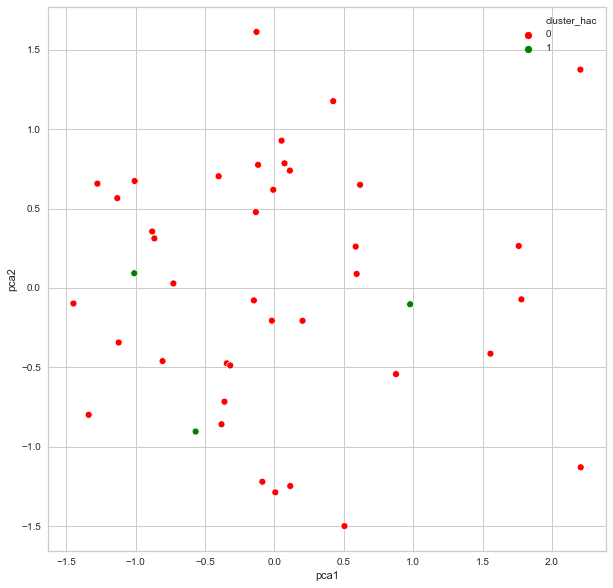

In [55]:
subset_ft01_hac = pd.concat([df_ft01_pca,pd.DataFrame({'cluster_hac':y_hc})], axis = 1)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = 'cluster_hac', data = subset_ft01_hac, palette =['red','green'])
plt.show()

# DBSCAN

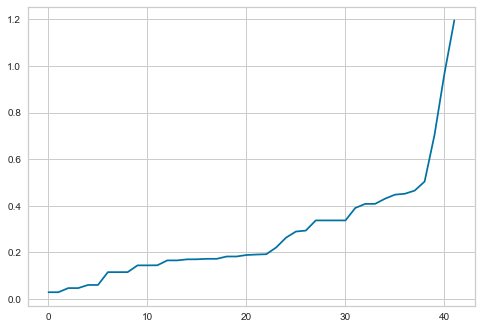

In [60]:
#DBSCAN, let's find appropriate epsilon:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_ft01_pca)
distances, indices = nbrs.kneighbors(df_ft01_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Text(0.5, 1.0, 'DBSCAN on PCA')

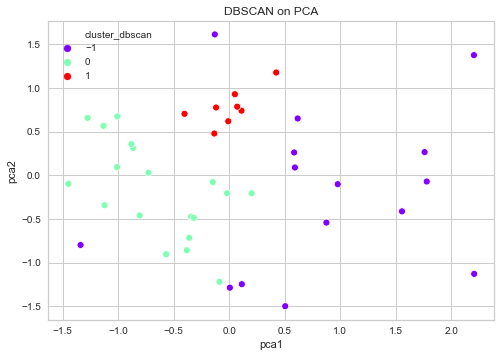

In [61]:
db = DBSCAN(eps=0.5, min_samples=5).fit(df_ft01_pca)
y_dbscan=db.labels_
df_pca_dbscan_01 = pd.concat([df_ft01_pca,pd.DataFrame({'cluster_dbscan':y_dbscan})], axis = 1)
a = sns.scatterplot(x='pca1', y='pca2', hue = 'cluster_dbscan', data = df_pca_dbscan_01,palette = 'rainbow')
a.set_title('DBSCAN on PCA')

In [62]:
#Correlation check
subset_ft01_dbscan = pd.concat([subset_ft01, pd.DataFrame({'cluster_dbscan':y_dbscan})], axis = 1)
corr_table = subset_ft01_dbscan.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['cluster_dbscan']

ageGroup                           NaN
gender                             NaN
bmi                                NaN
smoker                             NaN
employed                           NaN
sports                             NaN
timeOfDay                          NaN
testSuit                           NaN
firstTask                          NaN
dist_6mwt                          NaN
dist_sct                           NaN
swe_b_t1                           NaN
swe_b_t4                           NaN
swe_m_t1                           NaN
swe_m_t4                           NaN
swe_f_t1                           NaN
swe_f_t4                           NaN
swe_a_t1                           NaN
swe_a_t4                           NaN
bsa_B                              NaN
bsa_F                              NaN
bsa_S                              NaN
wkv_a_t1                           NaN
wkv_a_t2                           NaN
wkv_a_t3                           NaN
wkv_a_t4                 

# GMM

In [63]:
#Gaussian misture, let's choose the proper number of clusters:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df_ft01_pca)
    df_ft01_pca['Cluster'] = gmm.predict(df_ft01_pca)
    d = metrics.silhouette_score(df_ft01_pca, df_ft01_pca['Cluster'], metric='euclidean')
    print(i, d)

2 0.4561578920601943
3 0.4561578920601943
4 0.4738969251167406
5 0.5868344699745025
6 0.5544766764496517
7 0.5728463926861739
8 0.5987153067308337
9 0.6268838480618693
10 0.6387518129946219


In [65]:
df_ft01_pca.drop(['Cluster'], axis = 1,inplace=True)

Text(0.5, 1.0, 'Gaussian mixture on PCA (subset)')

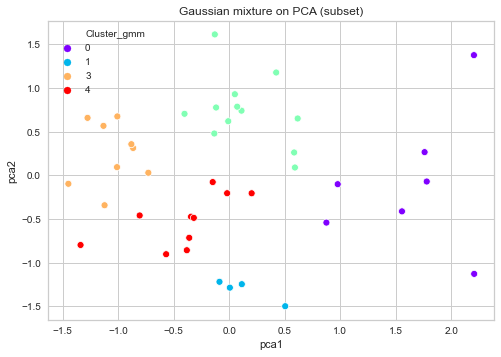

In [69]:
gmm = GaussianMixture(n_components=5)
gmm.fit(df_ft01_pca)
df_ft01_pca['Cluster_gmm'] = gmm.predict(df_ft01_pca)
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster_gmm', data = df_ft01_pca, palette = 'rainbow')
ax.set_title('Gaussian mixture on PCA (subset)')

In [70]:
#Correlation check
subset_ft01_gmm = pd.concat([subset_ft01, df_ft01_pca['Cluster_gmm']], axis = 1)
corr_table = subset_ft01_gmm.corr(method='pearson')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['Cluster_gmm']

ageGroup                           NaN
gender                             NaN
bmi                                NaN
smoker                             NaN
employed                           NaN
sports                             NaN
timeOfDay                          NaN
testSuit                           NaN
firstTask                          NaN
dist_6mwt                          NaN
dist_sct                           NaN
swe_b_t1                           NaN
swe_b_t4                      0.581910
swe_m_t1                           NaN
swe_m_t4                           NaN
swe_f_t1                           NaN
swe_f_t4                           NaN
swe_a_t1                           NaN
swe_a_t4                           NaN
bsa_B                              NaN
bsa_F                              NaN
bsa_S                              NaN
wkv_a_t1                      0.625502
wkv_a_t2                      0.638494
wkv_a_t3                           NaN
wkv_a_t4                 

In [72]:
cluster_assigned= pd.concat([df_ID,pd.DataFrame({'cluster_PCA_KMeans':labels_ft01}),
                             pd.DataFrame({'cluster_PCA_HAC':y_hc}),
                             pd.DataFrame({'cluster_PCA_DBSCAN':y_dbscan}), 
                             pd.DataFrame({'cluster_PCA_GMM':df_ft01_pca['Cluster_gmm']})], axis = 1)

In [ ]:
cluster_assigned

In [74]:
cluster_assigned.to_csv('cluster_assigned_subset.csv')

PCA analysis

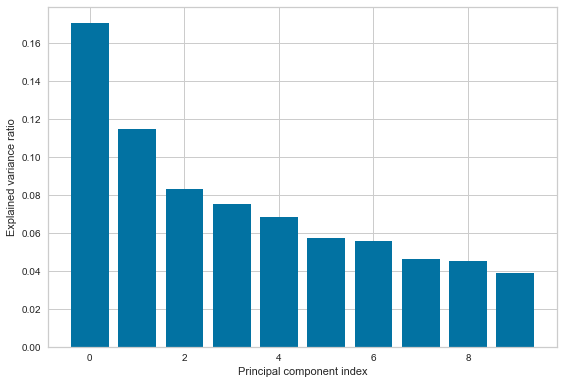

array([0.17042475, 0.11460394, 0.08276285, 0.075339  , 0.06806721,
       0.05702352, 0.05539801, 0.045934  , 0.04494183, 0.03888861])

In [75]:
#dimensionality reduction
#from sklearn.decomposition import PCA
# Initialize the algorithm and set the number of PC's
# Obtain the principal components 
pca=PCA(n_components=10)
principal_comp=pca.fit_transform(norm_subset_ft01)
df_ft01_pca = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3','pca4', 'pca5',
                                                       'pca6', 'pca7','pca8', 'pca9','pca10'])
#Explained variance 
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

#Create plot
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=1,
        align='center', label='Individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.tight_layout()
plt.show()

exp_var_pca

In [77]:
#most important features
n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = subset_ft01.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
df 

,0,1
0,PC0,wkv_a_t4
1,PC1,arrival_car/motorcycle
2,PC2,testSuit
3,PC3,ageGroup
4,PC4,gender
5,PC5,gender
6,PC6,testSuit
7,PC7,employed
8,PC8,timeOfDay
9,PC9,swe_f_t4
